In [ ]:
## logistic regression is a type of regression analysis that helps in
## estimating the likelihood of an event to occur based on some given
## paramters. It is used as a classification technique with a binary outcome
## The probabilities describing the possible outcomes of a single trial
## are modeled, as a function of the explantory(predictor) variables

In [ ]:
#### We will use titatnic dataset (data exploration is done already)
#### survival: this refers to the survival of the passengers(0=No and 1=Yes)
#### Pclass: passenger class(1=1st, 2=2nd, 3=3rd)
#### Name: This refers to the names of the passengers
#### Sex: gender of the passengers
#### Age..

In [4]:
import pandas as pd
df = pd.read_csv("C:\\data\\titanic_data.csv")

In [5]:
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
## We can see ticket and Cabin columns won't add much value to the model
## building process as the Ticket column is basically a unique identifier
## for each passenger and the cabin column is mostly empty. Also, we'll
## remove the rows with the missing values.

## We'll remove these two columns from our DataFrame

## Applying axis as 1 to remove the columns with the following labels
df = df.drop(['Ticket','Cabin','Name'], axis=1)

In [7]:
# Remove missing values
df = df.dropna()

In [16]:
## creating training and testing sets
## Python Package Patsy its like R
from patsy import dmatrices, build_design_matrices
import statsmodels.api as sm
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Parch'

In [17]:
## create results dictionary to hold our regression results
## for easy analysis later
df_train = df.iloc[0:600, : ]
df_test = df.iloc[600: , : ]

In [18]:
##Splitting the data into dependant and independat variables
y_train, x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test, x_test = dmatrices(formula, data=df_test, return_type='dataframe')

In [19]:
## building a model
model = sm.Logit(y_train, x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Sat, 05 Oct 2019   Pseudo R-squ.:                  0.3333
Time:                        00:15:27   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

In [ ]:
## We can see maximum likelihood estimation has been used to predict
## the coefficients. The pseudo r square is similar to the r square of linear regression,
## which is measured goodness of it. A pseudo r square value between
## 0.2 and 0.4 is considered good that we have got a vlue of 0.33

In [20]:
## We will rebuild the model by using predicators, such as class, age, sex and number of siblings
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp'

In [21]:
y_train, x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test, x_test = dmatrices(formula, data=df_test, return_type='dataframe')

In [22]:
#instaniate our model
model = sm.Logit(y_train, x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Oct 2019   Pseudo R-squ.:                  0.3307
Time:                        00:31:53   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

In [27]:
import matplotlib.pyplot as plt

In [28]:
## Model Evaluation
kde_res = sm.nonparametric.KDEUnivariate(res.predict())
kde_res.fit()

Text(0.5, 1.0, 'Distribution of our predictions')

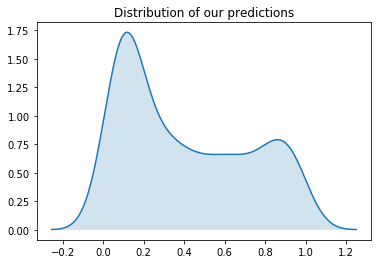

In [29]:
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support, kde_res.density, alpha=0.2)
plt.title("Distribution of our predictions")

In [ ]:
## density is higher near the probabilities of 0 and 1, which is a good sign
## and shows that the model is able to predict some patterns from 
## the data given. It also shows the density is the highest near 0, 
## which means that a lot of people did not survive.

Text(0.5, 1.0, 'The change of survival probability by Gender being Male')

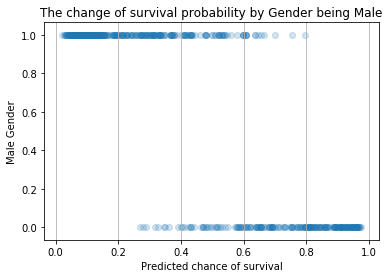

In [30]:
##Lets see prediction distribution based on the male gender
plt.scatter(res.predict(), x_train['C(Sex)[T.male]'], alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel('Predicted chance of survival')
plt.ylabel('Male Gender')
plt.title('The change of survival probability by Gender being Male')

Text(0.5, 1.0, 'The chance of survival probability by lower class which is 3rd class')

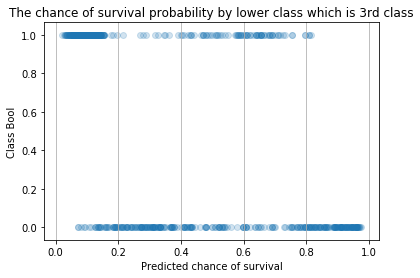

In [31]:
## lets the distribution of the prediction based on the lower class of the passengers
plt.scatter(res.predict(), x_train['C(Pclass)[T.3]'], alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") #Boolean class to show if its 3rd class
plt.grid(b=True,which='major', axis='x')
plt.title("The chance of survival probability by lower class which is 3rd class")

Text(0, 0.5, 'Age')

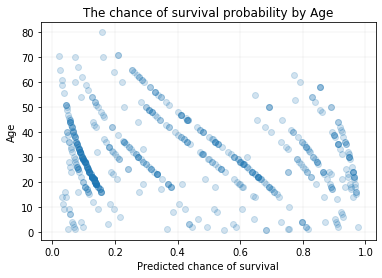

In [32]:
## Lets see the distribution of the probability with respect to the age of passengers
plt.scatter(res.predict(), x_train.Age, alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The chance of survival probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Text(0, 0.5, 'No.of Siblings/Spouses')

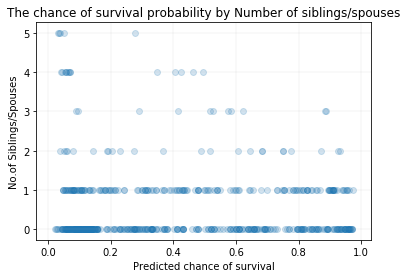

In [34]:
## Lets see the distribution of the probabily with respect to the number of sibilings/spouses
plt.scatter(res.predict(), x_train.SibSp, alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The chance of survival probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No.of Siblings/Spouses")

In [36]:
# Evaluating model based on test data
y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
print (pd.crosstab(y_test.Survived, y_pred_flag, rownames=['Actual'], colnames=['Predicted']))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24


In [38]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_flag))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        67
         1.0       1.00      0.53      0.70        45

    accuracy                           0.81       112
   macro avg       0.88      0.77      0.78       112
weighted avg       0.86      0.81      0.80       112



In [ ]:
## Precision tells you that among all the predictions of class 0 or class 1,
## how many of them have been correctly predicited. SO, in the
## preceding case, 76% of the prediction nonsurvivors is correct
## and 100% of the prediction of those who have survived is correct


## Recall tells you that out of actual instances, how many of them have
## been predicted correctly. So, in the preceding case, all the people
## who did not survive have been predicted correctly with an accuracy of 100%


In [42]:
##Lets plot Receiver Operating Characteristics (ROC & AOC)
from sklearn import metrics
fpr, tpr, thresholds= metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print ("Area under the ROC curve : %f" %roc_auc)

Area under the ROC curve : 0.879934


In [ ]:
## FPR = FP/FP+TN , TPR = TP/TP+FN

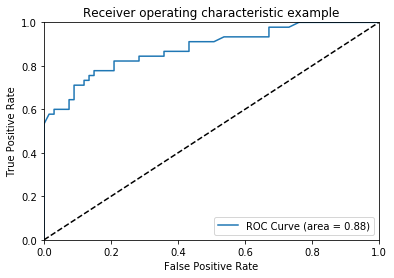

In [43]:
# Plot ROC Curve
plt.clf()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
## Model building and evaluation with SciKit
#instantiate a logistic regression model, and fit with X and y 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)

C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
import numpy as np
pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.679010549893697]
1,C(Pclass)[T.2],[-0.9411538513160118]
2,C(Pclass)[T.3],[-2.139352066973035]
3,C(Sex)[T.male],[-2.3437849603286796]
4,Age,[-0.031432327826539076]
5,SibSp,[-0.2976887505990669]


In [49]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1]>0.7
print (pd.crosstab(y_test.Survived,
                   y_pred_flag,
                  rownames = ['Actual'],
                  colnames =['Predicted']))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           23     22


In [50]:
print (classification_report(y_test, y_pred_flag))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        67
         1.0       1.00      0.49      0.66        45

    accuracy                           0.79       112
   macro avg       0.87      0.74      0.76       112
weighted avg       0.85      0.79      0.77       112



In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
print (" Area under the ROC curve : %f"%roc_auc)

 Area under the ROC curve : 0.878275


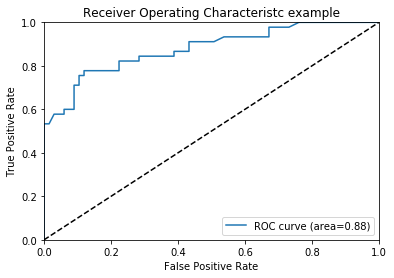

In [55]:
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' %roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristc example')
plt.legend(loc='lower right')
plt.show()